# SOBRE O PROJETO

O projeto utiliza uma base de dadas com breve tratamento para facilitar a análise. O objetivo desde script em si, é uma análise básica sobre os indicadores do PNAD, não se tratando de um estudo aprofundado, sem Machine Learning e sem análises econômicas mais avançadas.<br>

É um estudo básico e inicial, que servirá de abertura para novos códigos e análises sobre **políticas públicas** e **indicadores sociais**.



## Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> visa apontar, de maneira contínua, diversas características da população brasileira, abrangendo áreas como educação, trabalho, renda, moradia e outros aspectos relevantes. Além disso, são realizadas pesquisas periódicas, de acordo com as necessidades de informação do país, abordando temas como migração, fertilidade, casamentos, saúde, segurança alimentar e outros. Ao longo dos últimos 49 anos, o levantamento dessas estatísticas tem se mostrado um instrumento crucial para a formulação, validação e avaliação de políticas públicas voltadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

**OBS:** Até o presente dia, a última pesquisa inserida no site do IBGE é referente até o ano de 2015 (série iniciada em 2001)

### Onde encontrar os dados

https://www.ibge.gov.br/estatisticas/sociais/habitacao/9127-pesquisa-nacional-por-amostra-de-domicilios?=&t=microdados

### **DICIONÁRIO DE DADOS**

##### **Renda** <br>
Rendimento mensal do trabalhor principal para pessoas de 10 anos ou mais de idade.

##### **Idade** <br>
Idade do morador na data de referência em anos.

##### **Altura** <br>
Elaboração autônoma

##### **Altura do morador em metros.**

UF
|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

##### **Sexo**
|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

##### **Anos de Estudo**
|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

##### **Cor**
|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

> **IMPORTANTE**

Tivemos que realizar alguns tratamentos nos dados para evitar enviesamento ou ação prejudicial à análise:
- 1. Eliminamos em <b>Renda</b> os valores inválidos (999 999 999 999)
- 2. Ainda em <b>Renda</b> eliminamos os valores *missing*
- 3. Consideremos somente os registros das <b>Pessoas de Referência</b> ou  (responsável pelo domicílio) de cada domicílio 

# Análise Descritiva

#### **BIBLIOTECAS**

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [76]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
 7   Faixa_Renda     76840 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 4.7+ MB


#### **BASE DE DADOS**

In [11]:
dados = pd.read_csv('data/dados.csv')

# 01. Análise Exploratória

In [12]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


In [13]:
# Tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [14]:
# Análise estatística
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


In [15]:
# Dimensões do dataset
dados.shape

(76840, 7)

In [16]:
# Verificando presença de valores ausentes
dados.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

> INSGHT:

- Não identificamos, até o momento, qualquer característica que prejudique a nossa análise

# 02 - Processamento

#### Tratando a variável **'Renda'**

In [17]:
len(dados['Renda'].value_counts())

1606

> **ATENÇÃO**
- Como são mais de 1.600 registros sobre renda, trona-se inviável trabalhar com tantos registros. Por isso, faremos um agrupamento de valores, utilizando uma tabela de frequências:

**Classes de Renda**
|**Código**|**Descrição**|
|---|---|
|A|Acima de 25 SM|
|B|De 15 a 25 SM|
|C|De 5 a 15 SM|
|D|De 2 a 5 SM|
|E|Até 2 SM|

> **ATENÇÃO**: valor do salário mínimo à época da pesquisa **R$ 788,00**

### 1 - Criando os intevalos de cada classe em reais (R$)

In [18]:
# Atribuindo o valor do salário mínimo à uma variável
sal_min = 788

# Criando um array com as faixas
classes = ['Até 2SM', 'De 2 a 5 SM', 'De 5 a 15 SM', 'De 15 a 25 SM', 'Acima de 25 SM']

# Array com as condições para cada faixa salarial
conditions = [(dados['Renda'] < 2*sal_min),
              (dados['Renda'] >= 2*sal_min) & (dados['Renda'] < 5*sal_min),
              (dados['Renda'] >= 5*sal_min) & (dados['Renda'] < 15*sal_min),
              (dados['Renda'] >= 15*sal_min) & (dados['Renda'] < 25*sal_min),
              (dados['Renda'] >= 25*sal_min)]

# Atribuindo valores à coluna "Faixa_Renda" com base nas condições definidas
dados['Faixa_Renda'] = np.select(conditions, classes, default = np.nan)

In [19]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Faixa_Renda
0,11,0,23,8,12,800,1.603808,Até 2SM
1,11,1,23,2,12,1150,1.739790,Até 2SM
2,11,1,35,8,15,880,1.760444,Até 2SM
3,11,0,46,2,6,3500,1.783158,De 2 a 5 SM
4,11,1,47,8,9,150,1.690631,Até 2SM
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,Até 2SM
76836,53,0,30,4,7,1500,1.792934,Até 2SM
76837,53,0,32,8,12,1300,1.830587,Até 2SM
76838,53,0,57,8,4,1500,1.726344,Até 2SM


In [20]:
dados['Faixa_Renda']

0            Até 2SM
1            Até 2SM
2            Até 2SM
3        De 2 a 5 SM
4            Até 2SM
            ...     
76835        Até 2SM
76836        Até 2SM
76837        Até 2SM
76838        Até 2SM
76839        Até 2SM
Name: Faixa_Renda, Length: 76840, dtype: object

### 2 - Criando a coluna de frequências no dataframe

In [21]:
# Agrupando e agregando (por comntagem de registros)
freq_col = dados.groupby('Faixa_Renda').agg({'Idade': 'count'})

# Renomeando a coluna 'Idade' para 'Frequência' 
freq_col.rename(columns = {'Idade': 'Frequencia'}, inplace = True)

# Redefinindo o pindice do dataframe
freq_col = freq_col.reset_index()

# Visualizando
freq_col

,Faixa_Renda,Frequencia
0,Acima de 25 SM,420
1,Até 2SM,49357
2,De 15 a 25 SM,823
3,De 2 a 5 SM,18972
4,De 5 a 15 SM,7268


### 3 - Criando a coluna com os percentuais

In [22]:
freq_col['Faixa de Renda (%)'] = (freq_col['Frequencia'] / sum(freq_col['Frequencia'])) * 100
freq_col

,Faixa_Renda,Frequencia,Faixa de Renda (%)
0,Acima de 25 SM,420,0.546590
1,Até 2SM,49357,64.233472
2,De 15 a 25 SM,823,1.071057
3,De 2 a 5 SM,18972,24.690265
4,De 5 a 15 SM,7268,9.458615


### 4 - Ordenando as linhas de forma descendente de 'Frequencia'

In [23]:
freq_col.sort_values(by = ['Frequencia'], ascending = False, inplace = True)
freq_col

,Faixa_Renda,Frequencia,Faixa de Renda (%)
1,Até 2SM,49357,64.233472
3,De 2 a 5 SM,18972,24.690265
4,De 5 a 15 SM,7268,9.458615
2,De 15 a 25 SM,823,1.071057
0,Acima de 25 SM,420,0.546590


# 3. Plots

### 3.1 Gráfico com as informações da tabela de frequências do dataframe **freq_col**

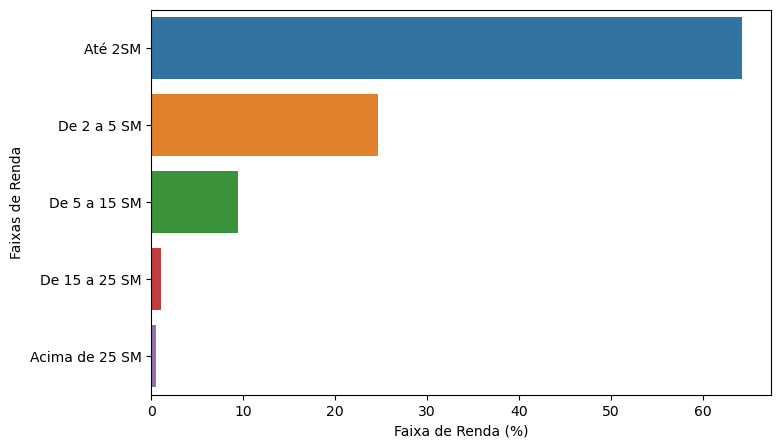

In [24]:
# Tamanho do plot
plt.figure(figsize = (8, 5))

# Plotando com gráfico de barras invertido
ax = sns.barplot(
    x = freq_col['Faixa de Renda (%)'],
    y = freq_col.Faixa_Renda
                 )
plt.xlabel('Faixa de Renda (%)')
plt.ylabel('Faixas de Renda')

# Plot
plt.show()

> **Resultado da Análise**
- Através da categorização das faixas de renda, notamos que existe uma predominância de moradores com renda de até **2 salários mínimos** (R$ 1.576,00 na época da pesquisa)
- Também indentificamos uma evidência já conhecida no Brasil, que é a desigualdade de renda, pois quanto maior a faixa de renda, menor o número de moradores nessa faixa

### 3.2 Variável IDADE

Text(0, 0.5, 'Densidade')

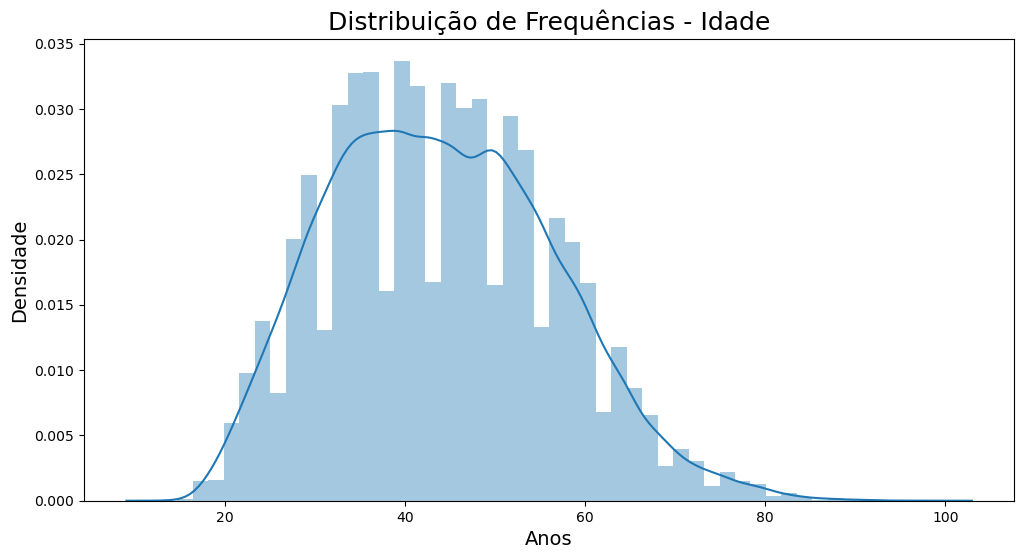

In [77]:
# Tamanho e tipo do plot
ax = sns.distplot(dados.Idade)
ax.figure.set_size_inches(12, 6)

# Labels
ax.set_title('Distribuição de Frequências - Idade', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)

> **Análise do gráfico**

- Percebe-se uma distribuição simétrica com pico na **faixa dos 40 anos**. Apesar de isso nos dizer que a maioria se encontra nessa faixa etária, a maioria dos moradores está situada **entre 30 e 50 anos**.

### 3.3 Variável **Anos de Estudo**

Text(0, 0.5, 'Densidade')

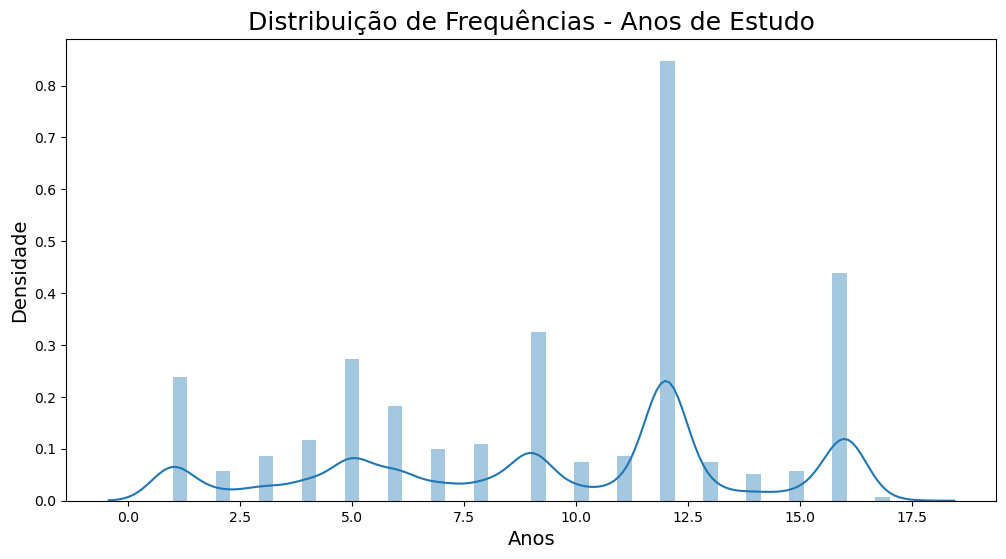

In [78]:
# Tamanho e tipo do plot
ax = sns.distplot(dados['Anos de Estudo'])
ax.figure.set_size_inches(12, 6)

# Labels
ax.set_title('Distribuição de Frequências - Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)

Text(0.5, 0, 'Anos')

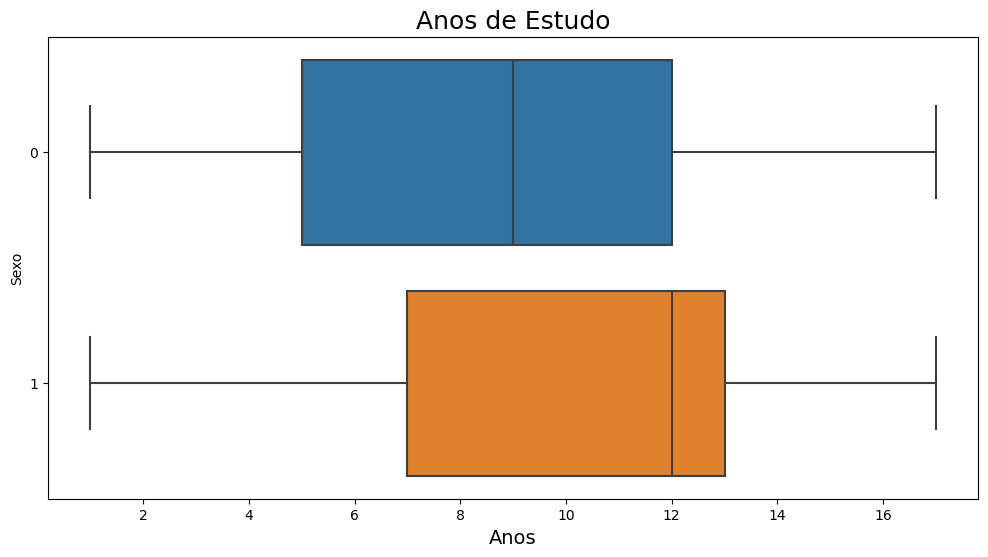

In [27]:
# Plot
ax = sns.boxplot(
    x = 'Anos de Estudo', 
    y = 'Sexo', 
    data = dados, 
    orient = 'h')
ax.figure.set_size_inches(12, 6)

# Labels
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)

> **Análise do gráfico**

- Aqui notamos que os dados estão bem dispersos e com uma assimetria à esquerda. Apesar de alguns picos, os 2 maiores encontram-se em 12 e 16 anos respectivamente, isso mostra que **há uma maior concentração de amostras dentro desses intervalos de anos de estudo**.

### 3.4 Variável **Renda**

Text(0, 0.5, 'Densidade')

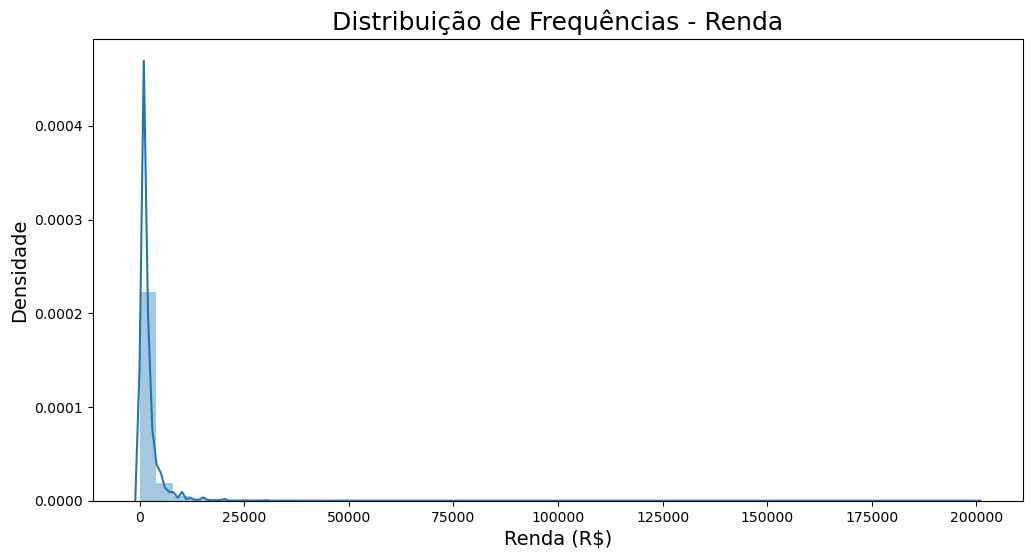

In [79]:
# Tamanho e tipo do plot
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(12, 6)

# Labels
ax.set_title('Distribuição de Frequências - Renda', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)

Text(0.5, 0, 'R$')

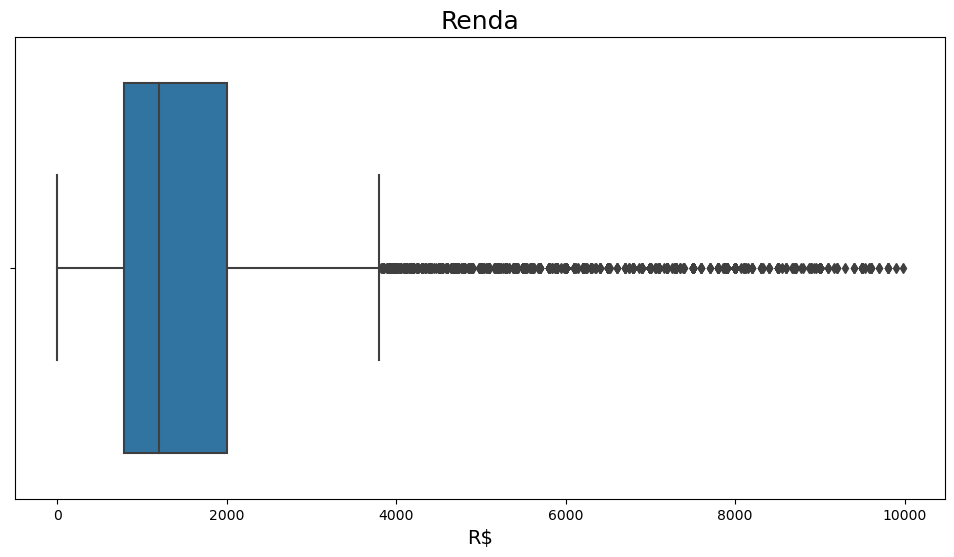

In [29]:
# Plot
ax = sns.boxplot(
    x = 'Renda',
    data = dados.query('Renda < 10000'),
    orient = 'h')
ax.figure.set_size_inches(12, 6)

# Labels
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

Text(0.5, 0, 'R$')

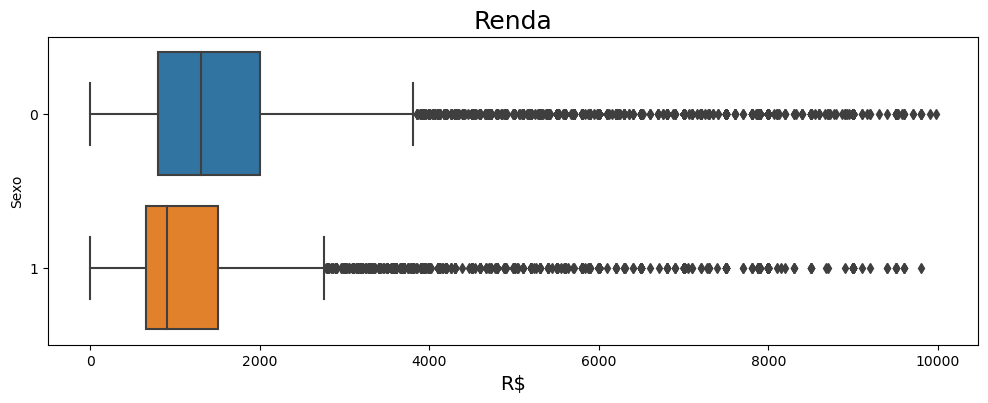

In [30]:
# Plot
ax = sns.boxplot(
    x = 'Renda', 
    y = 'Sexo', 
    data = dados.query('Renda < 10000'), 
    orient = 'h')
ax.figure.set_size_inches(12, 4)

# Labels
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

> **Análise do Gráfico**
- Gráfico que mostra uma assimetria à direita e que reafirma que a maioria se encontra em uma faixa de renda mais baixa. Fica clara também a existência de um grande número outliers, muito acima dos valores máximos existentes.

#### 3.5 Variável **Altura**

Text(0, 0.5, 'Densidade')

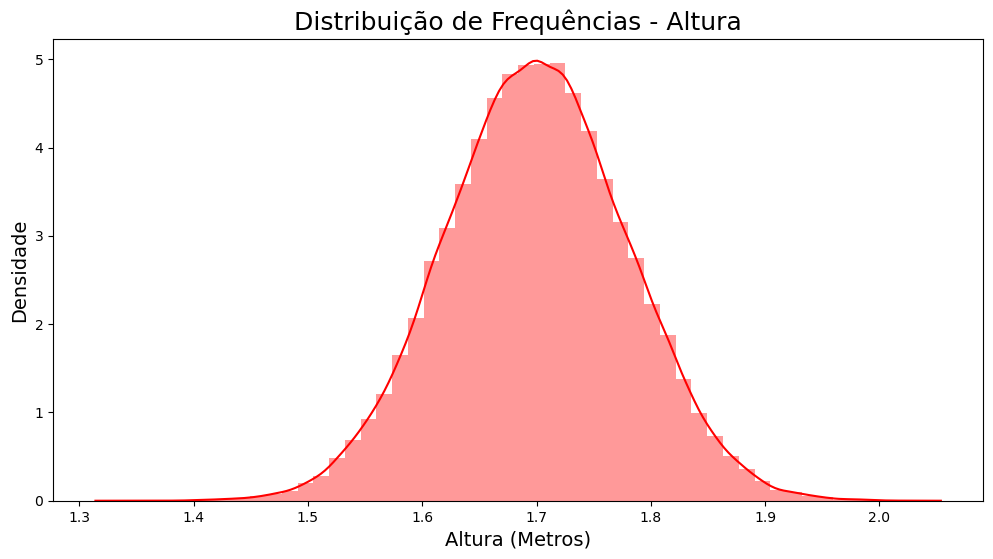

In [80]:
# Tamanho e tipo do plot
ax = sns.distplot(
    dados['Altura'],
    color='red')
ax.figure.set_size_inches(12, 6)

# Labels
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Altura (Metros)', fontsize=14)
ax.set_ylabel('Densidade', fontsize=14)

#### 4.6 Boxplot de Altura

Text(0.5, 0, 'Metros')

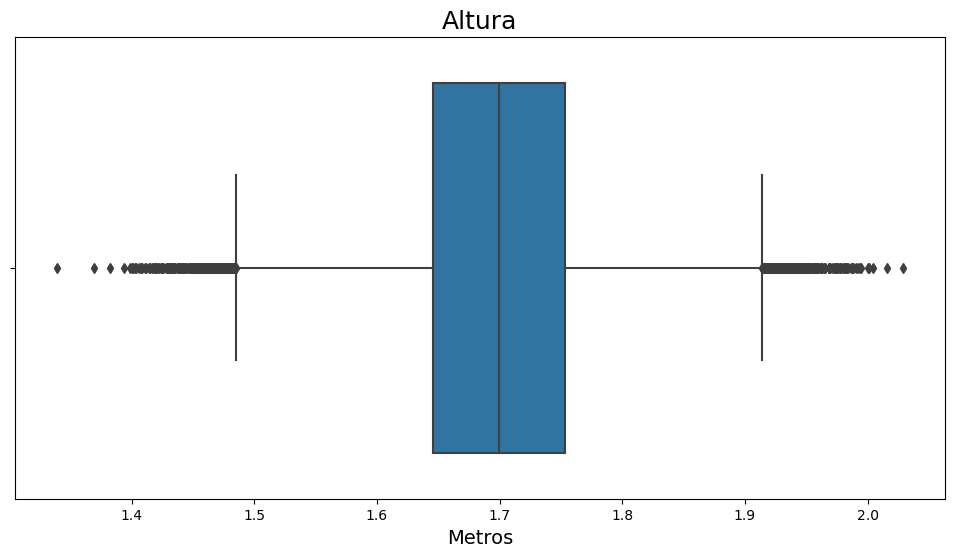

In [32]:
# Plot
ax = sns.boxplot(
    x = 'Altura',
    data = dados,
    orient = 'h')
# Dimensões
ax.figure.set_size_inches(12, 6)

# Labels
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

##### 3.5.1 Altura x Sexo

Text(0.5, 0, 'Metros')

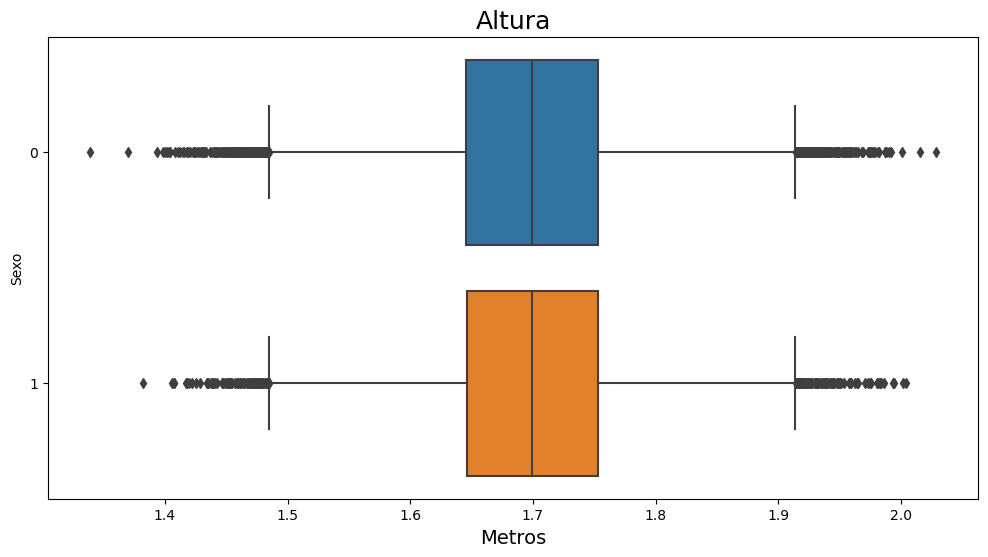

In [33]:
# Plot
ax = sns.boxplot(
    x = 'Altura',
    y = 'Sexo',
    data = dados,
    orient = 'h')
# Dimensões
ax.figure.set_size_inches(12, 6)

# Labels
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)

> **Resultado da Análise**
- Apesar desta estatística não parecer tão relevante para nossas análises, esta nos apresenta um insight sobre o desenvolvimento destas pessoas, utilizando dados sobre alimentação, renda, qualidade de vida, e diversos outros indicadores que serão estudados nas próximas séries. 
- Notamos que os dados apresentam uma distribuição simétrica, com pico em aproximadamente 1,70 metros, com algumas variações relevantes entre 1,60cm e 1,80cm.
- Plotamos um **bloxplot** de **altura** abaixo do distplot justamente para visualizarmos melhor a distribuição dos dados
- Ainda com o usso de um boxplot, apontamos que a distribuição dos dados tanto para mulheres quanto para homens são idênticas

### 3.2 Pessoas com rendimento até R$ 20.000,00

Text(0.5, 0, 'Renda (R$)')

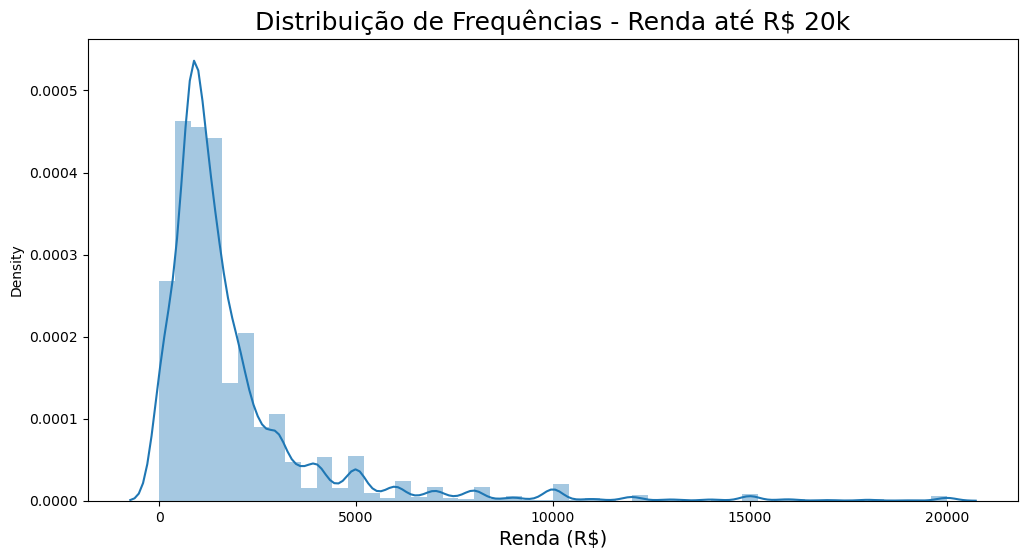

In [81]:
# Criando um dataframe com informações sobre pessoas com renda de 20k ou menos
dados_renda_20k = dados[dados['Renda'] <= 20000].reset_index(drop = True)

# Construção do plot
ax = sns.distplot(dados_renda_20k.Renda)

# Labels
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Renda até R$ 20k', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)

### 3.3 Diistribuição de Frequências Acumulada de Idade

Text(0.5, 0, 'Anos')

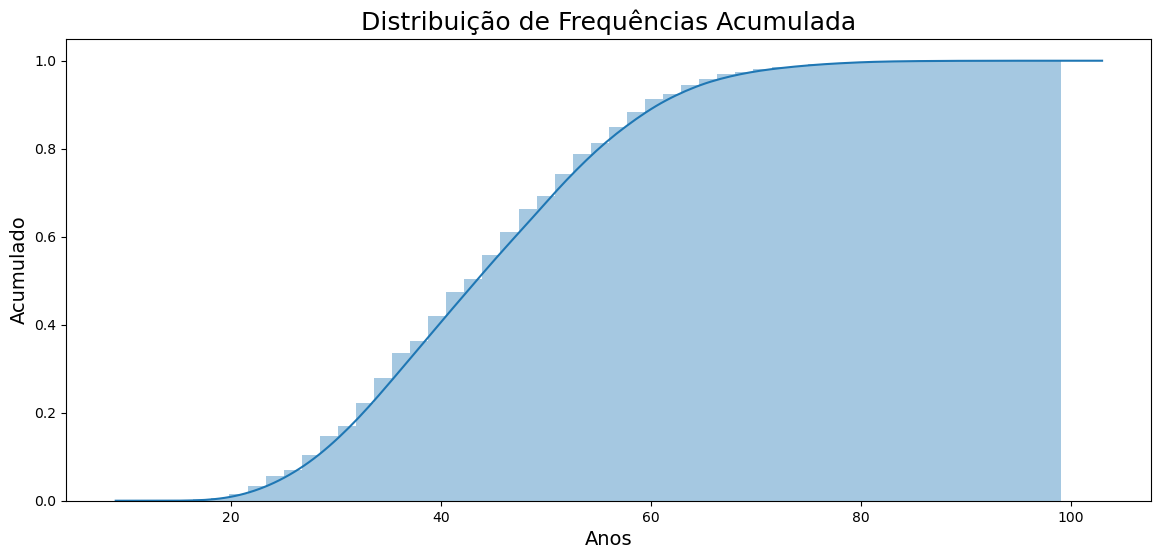

In [35]:
# Plot
ax = sns.distplot(
    dados['Idade'],
    hist_kws = {'cumulative': True},
    kde_kws = {'cumulative': True})
# Dimensões em polegadas
ax.figure.set_size_inches(14, 6)

# Labels
ax.set_title('Distribuição de Frequências Acumulada', fontsize=18)
ax.set_ylabel('Acumulado', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)

> **Análise do gráfico**
- Como notamos anteriormente, há uma crescimento expressivo da renda para pessoas a **partir dos 30 anos**, havendo uma estabilização a partir dos **~65 anos**

# 04. Análise Estatística

### 1.0 Tratamento

> **Atenção:** aqui criamos dicionários de dados com nossas variáveis recebendo classificações para as linhas e colunas do dataframe

In [36]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

### 2.0 Tabela Cruzada: Sexo x Cor

In [37]:
# Construção de uma tabela cruzada
freq_sex_cor = pd.crosstab(dados['Sexo'],
                   dados['Cor']).sort_index(axis=0, ascending=True)
freq_sex_cor.rename(index = sexo, inplace = True)
freq_sex_cor.rename(columns = cor, inplace = True)
freq_sex_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [38]:
# Tabela cruzada com distribuição de freequências
perc_sex_cor = pd.crosstab(dados['Sexo'],
                   dados['Cor'],
                   normalize = True).sort_index(axis=0, ascending=True) * 100
perc_sex_cor.rename(index = sexo, inplace = True)
perc_sex_cor.rename(columns = cor, inplace = True)
perc_sex_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


> **Resultado da Análise**
- Notamos uma maior concentração de homens da cor parda (cerca de 33%) e de cor caucasiana (~28%)
- Para o sexo **feminino**, nota-se uma maior miscigenação com ~14% de mulheres pardas e caucasiana com ~13%


### 3.0 Comparativo Renda x Sexo x Cor

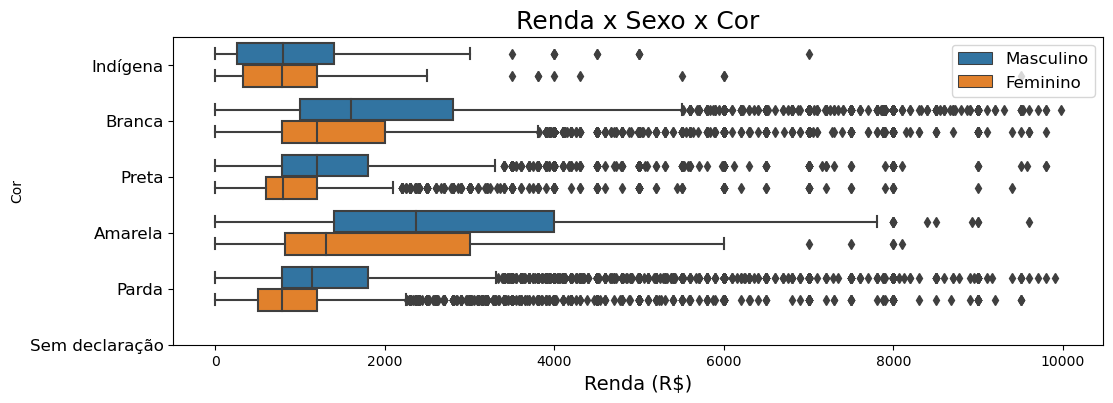

In [39]:
# Plot
ax = sns.boxplot(
    x = 'Renda', 
    y = 'Cor', 
    hue = 'Sexo', 
    data = dados.query('Renda < 10000'), 
    orient='h'
    )

# Dimensões do plot em polegadas
ax.figure.set_size_inches(12, 4)

# Labels
ax.set_title('Renda x Sexo x Cor', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_yticks([0, 1, 2, 3, 4, 5])  # Posições dos ticks em relação aos labels
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)
handles, _ = ax.get_legend_handles_labels() #O btém os handles (identificadores) e labels da legenda do gráfico
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

plt.show()


#### **Conclusão**
- Pessoas do sexo **masculino** e cor **amarela** possuem maior renda (~4k) com um limite máximo de ~8k, e mesma tendência se vê para o sexo **feminino** sendo com rendimentos menores
- Apesar da renda maior, notamos menor presença de **outliers** para essa etnia, mostrando-se mais homogênea
- Já os **indígenas** se mostram com um pouco mais de paridade, apesar de posuírem as menores rendas e menor número de **outliers** (homogeneidade) e uma renda média próxima do **2º quartil**
- As **mulheres negras** possuem menor dimensão em renda, mas com uma variação de valores extremos

### 3.1 Pessoas com Salário Mínimo ou menos

> Percentual de pessoas que ganham um salário mínimo (R$ 788,00) ou menos (usando as biblioteca estatística scipy)

In [40]:
perc_788 = stats.percentileofscore(dados['Renda'], 788, kind = 'weak')
perc_788 = round(perc_788, 2)  # Arredonda para 2 casas decimais
print('Um total de:', round(perc_788, 2), '% das pessoas ganham R$ 788 ou menos')

Um total de: 28.87 % das pessoas ganham R$ 788 ou menos


> Valor máximo de ganho para 99% das pessoas

In [41]:
valor_max = dados.Renda.quantile(0.99)
print('Aproximadamente 99% daas pessoas ganham:', "R$ {0:.2f}".format(valor_max))

Aproximadamente 99% daas pessoas ganham: R$ 15000.00


### 3.2 Comparativo Renda x Anos de Estudo x Sexo

> Serão organizados em uma tabela as estatísticas: 
- média
- mediana
- valor máximo
- desvio-padrão

In [42]:
# Criando dataframe com a tabela cruzada
df_renda = pd.crosstab(
    dados['Anos de Estudo'],
    dados['Sexo'], 
    values = (dados.Renda).round(2),
    aggfunc = {'mean', 'median', 'max', 'std'},  # aggfunc (recebe lista de funções)
    )

# Atribuindo os nomes às colunas e índice
df_renda.rename(columns = sexo, inplace = True)
df_renda.rename(index = anos_de_estudo, inplace = True)
df_renda

max                  mean               \
Sexo                           Masculino Feminino    Masculino     Feminino   
Anos de Estudo                                                                
Sem instrução e menos de 1 ano     30000    10000   799.494638   516.201748   
1 ano                              30000     2000   895.629047   492.771987   
2 anos                             40000     4000   931.178986   529.911638   
3 anos                             80000     3500  1109.203862   546.853916   
4 anos                             50000    10000  1302.329283   704.279111   
5 anos                             35000     8000  1338.653218   781.389776   
6 anos                             25000     6000  1448.875419   833.732824   
7 anos                             40000     9000  1465.497940   830.751004   
8 anos                             30000    18000  1639.396667   933.615351   
9 anos                             60000    20000  1508.038850   868.021700   
10 anos                            45000     6000  1731.270847   925.919225   
11 anos                           200000   100000  2117.060504  1286.790889   
12 anos                            30000   120000  2470.330776  1682.313725   
13 anos                            25000    20000  3195.099154  1911.730047   
14 anos                            50000    20000  3706.620269  2226.460457   
15 anos ou mais                   200000   100000  6134.279790  3899.513231   
Não determinados                    7000     3000  1295.761905   798.174419   

                                  median                   std               
Sexo                           Masculino Feminino    Masculino     Feminino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano     700.0    390.0  1023.904884   639.311534  
1 ano                              788.0    400.0  1331.950552   425.291842  
2 anos                             788.0    450.0  1435.173827   498.234168  
3 anos                             800.0    500.0  2143.800133   424.124446  
4 anos                            1000.0    788.0  1419.821787   629.553397  
5 anos                            1045.0    788.0  1484.650587   635.782641  
6 anos                            1200.0    788.0  1476.628602   574.547028  
7 anos                            1200.0    788.0  1419.708673   602.038029  
8 anos                            1300.0    800.0  1515.583715   896.781213  
9 anos                            1200.0    788.0  2137.664774   973.221652  
10 anos                           1218.0    800.0  2078.609734   620.611907  
11 anos                           1500.0   1000.0  2676.538942  1819.040417  
12 anos                           1800.0   1200.0  2268.081538  4851.833513  
13 anos                           2400.0   1300.0  2797.116800  2053.789771  
14 anos                           2500.0   1600.0  3987.214974  2064.083336  
15 anos ou mais                   4000.0   2800.0  7447.613594  4212.770709  
Não determinados                  1200.0    788.0   979.648745   459.985964

##### Plotando o resultado

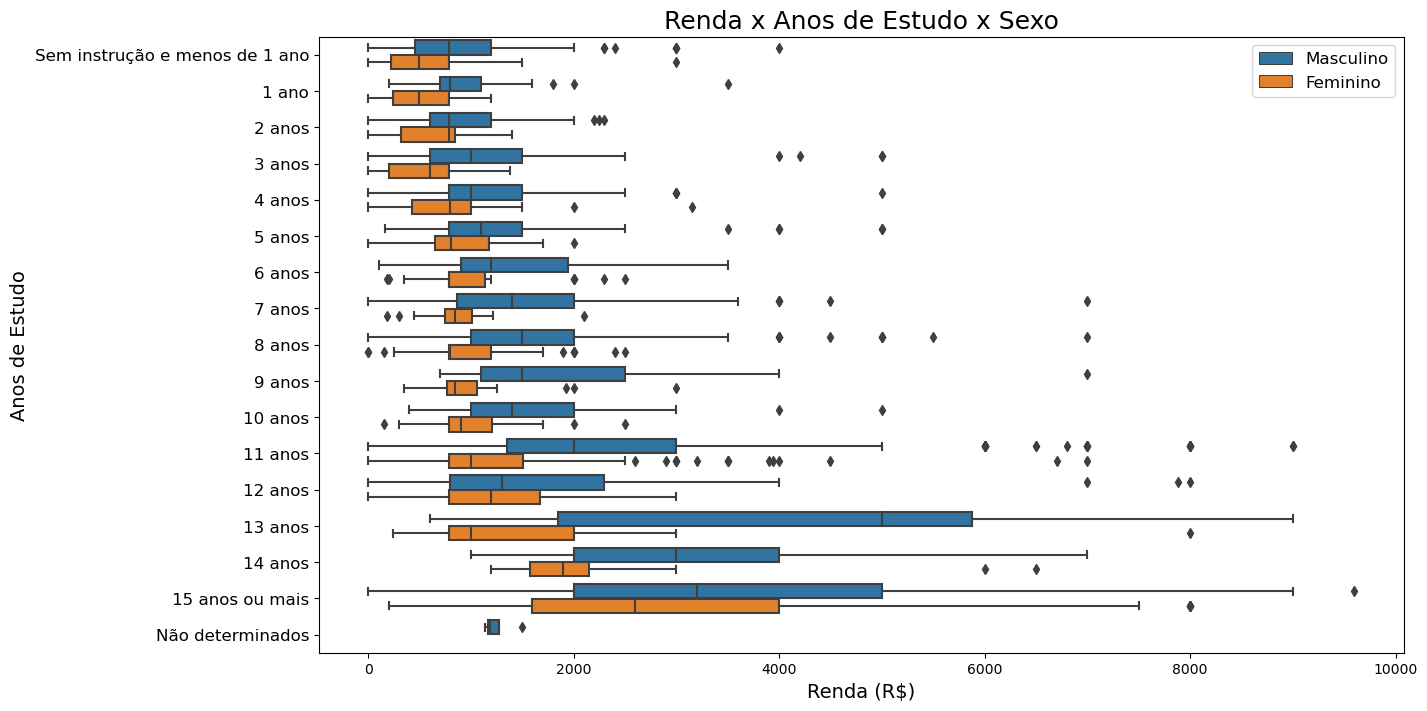

In [43]:
ax = sns.boxplot(
    x = 'Renda',
    y = 'Anos de Estudo',
    hue = 'Sexo',
    data = dados.query('Renda < 10000 and Idade == 50'),  # filtra o resultado
    orient = 'h')

# Dimensões do plot em polegadas
ax.figure.set_size_inches(14, 8)

# Labels
ax.set_title('Renda x Anos de Estudo x Sexo', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14)

# Configurando os ticks
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

> **Conclusão da Análise**
- O gráfico mostra renda de no máximo **R$ 1.000**
- Fica clara a tendência de que **quanto mais anos de estudo**, maior é a **renda**
- Em todas os anos de estudo, a predominância é masculina, tendo como ponto de atenção a faixa dos **13 anos**, onde a discrepância entre os sexo é grande e a mediana está próxima ao Q3
- Na faixa dos **13 anos de estudo** observa-se maiores limites de renda e ausência de outliers
- **Mulheres** com **13 e 15+ anos de estudo** mostram uma maior faixa de renda, mas aos **14 anos** a faixa de renda dimnui consideravelmente

### 3.4 Obtendo medidas estatísticas de Renda x Estado da federação (UF)

> Apesar de podermos obter tais estatísticas usando a função **describe()**, fazemos de outra maneira com objetivo de treinar outras possibilidades

In [44]:
# Criando o dataframe com as estatísticas
renda_por_uf = dados.groupby('UF').agg({'Renda': ['mean', 'median', 'max', 'min', 'std']})

# Renomeando as colunas
renda_por_uf.rename(index = uf, inplace = True)

renda_por_uf


Renda                                 
                            mean  median     max min          std
UF                                                               
Rondônia             1789.761223  1200.0   50000   0  2406.161161
Acre                 1506.091782   900.0   30000   0  2276.233415
Amazonas             1445.130100   900.0   22000   0  1757.935591
Roraima              1783.588889  1000.0   20000   0  2079.659238
Pará                 1399.076871   850.0   50000   0  2053.779555
Amapá                1861.353516  1200.0   15580   0  2020.688632
Tocantins            1771.094946  1000.0   60000   0  2934.590741
Maranhão             1019.432009   700.0   30000   0  1887.816905
Piauí                1074.550784   750.0   40000   0  2373.355726
Ceará                1255.403692   789.0   25000   0  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500   0  1651.805500
Paraíba              1293.370487   788.0   30000   0  1950.272431
Pernambuco           1527.079319   900.0   50000   0  2389.622497
Alagoas              1144.552602   788.0   11000   0  1237.856197
Sergipe              1109.111111   788.0   16000   0  1478.997878
Bahia                1429.645094   800.0  200000   0  3507.917248
Minas Gerais         2056.432084  1200.0  100000   0  3584.721547
Espírito Santo       2026.383852  1274.0  100000   0  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000   0  5214.583518
São Paulo            2638.104986  1600.0   80000   0  3503.777366
Paraná               2493.870753  1500.0  200000   0  4302.937995
Santa Catarina       2470.854945  1800.0   80000   0  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000   0  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000   0  3031.419122
Mato Grosso          2130.652778  1500.0   35000   0  2542.630178
Goiás                1994.580794  1500.0   30000   0  2221.933065
Distrito Federal     4241.954722  2000.0  100000   0  5550.463338

##### 3.4.1 Plot RENDA x UNIDADES DA FEDERAÇÃO

[Text(0, 0, 'Rondônia'),
 Text(0, 1, 'Acre'),
 Text(0, 2, 'Amazonas'),
 Text(0, 3, 'Roraima'),
 Text(0, 4, 'Pará'),
 Text(0, 5, 'Amapá'),
 Text(0, 6, 'Tocantins'),
 Text(0, 7, 'Maranhão'),
 Text(0, 8, 'Piauí'),
 Text(0, 9, 'Ceará'),
 Text(0, 10, 'Rio Grande do Norte'),
 Text(0, 11, 'Paraíba'),
 Text(0, 12, 'Pernambuco'),
 Text(0, 13, 'Alagoas'),
 Text(0, 14, 'Sergipe'),
 Text(0, 15, 'Bahia'),
 Text(0, 16, 'Minas Gerais'),
 Text(0, 17, 'Espírito Santo'),
 Text(0, 18, 'Rio de Janeiro'),
 Text(0, 19, 'São Paulo'),
 Text(0, 20, 'Paraná'),
 Text(0, 21, 'Santa Catarina'),
 Text(0, 22, 'Rio Grande do Sul'),
 Text(0, 23, 'Mato Grosso do Sul'),
 Text(0, 24, 'Mato Grosso'),
 Text(0, 25, 'Goiás'),
 Text(0, 26, 'Distrito Federal')]

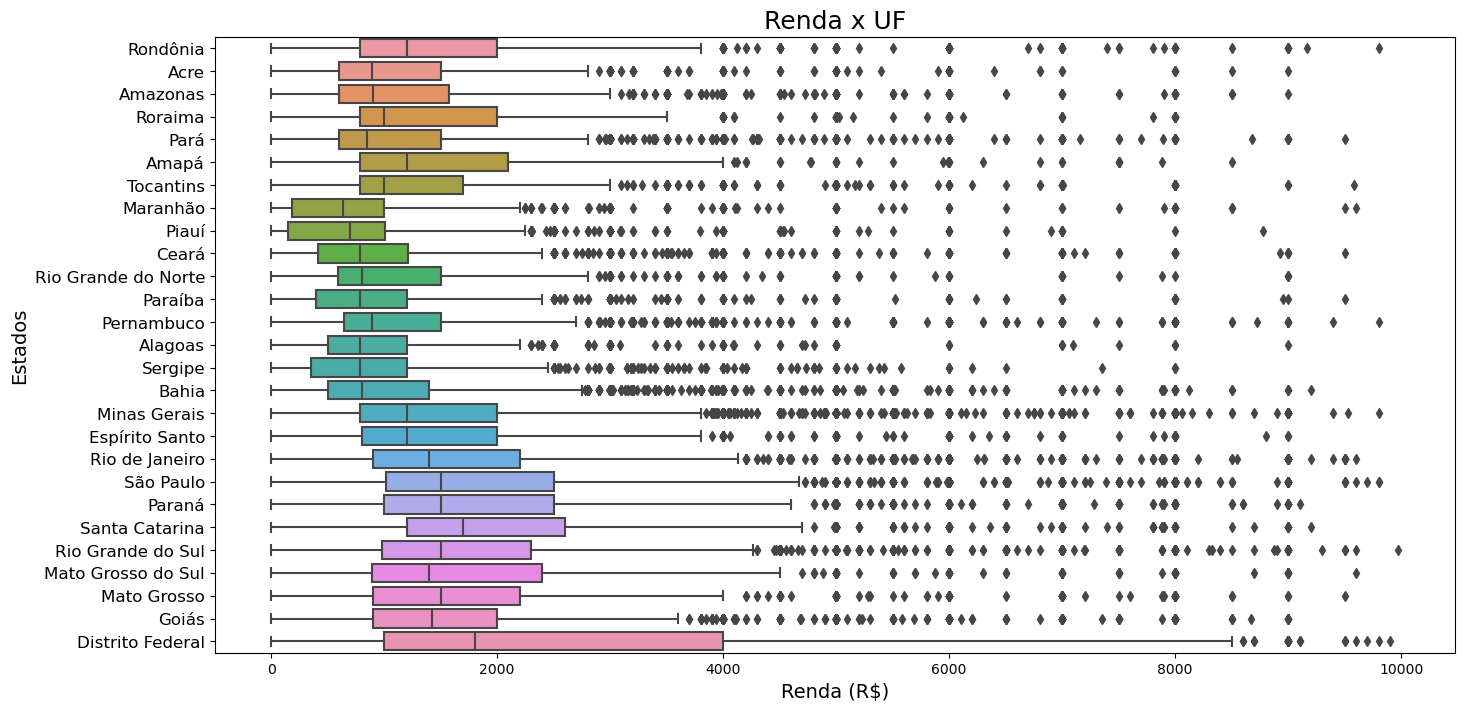

In [45]:
# Plot
ax = sns.boxplot(
    x = 'Renda', 
    y = 'UF', 
    data = dados.query('Renda < 10000'), 
    orient = 'h')
# Dimensão em polegadas
ax.figure.set_size_inches(16, 8)

# Labels
ax.set_title('Renda x UF', fontsize=18)
ax.set_xlabel('Renda (R$)', fontsize=14)
ax.set_ylabel('Estados', fontsize=14)

# Ticks com list comprehension que retorna a key se a key estiver dentro dos valores de UF
ax.set_yticklabels(
    [key for key in uf.values()], 
    fontsize=12)  

> **Conclusão da Análise**
- Nota-se que o **DF** é o estado com a **maior renda (cerca de 4k)**, tendo a sua mediana um pouco abaixo de 2k mas encontram-se valores que superam 8k, além da presença de outliers
- Maranhão, Piauí, Ceará, Paraíba e Bahia são os estados com as **menores rendas**, sendo que Maranhão e Piauí possuem a mediana localizada no Q2
- Curiosamente **São Paulo**, a cidade mais populosa naquela época, é superada por **Santa Catarina** e praticamente está pareada com **Paraná** e **Mato Grosso do Sul**